#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 2 (30 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A2_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 219056512

# Student name: Zhen Cai

## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [63]:
# INSERT your code (or comment) here

import numpy as np
import pandas as pd
import matplotlib. pyplot as plt

Df = pd.read_csv('clustering.csv')

Df_Q1 = Df.iloc[:, [0,1,2,3,4,5,6]]

Class_0 = Df.loc[Df['Class'] == 0]
Class_1 = Df.loc[Df['Class'] == 1]
Class_2 = Df.loc[Df['Class'] == 2]

print(Df_Q1)

Features = np.array(Df.columns)
print("The continous features are:",Features[0:6])
print("The discrete features is:",Features[7])

     height  length   width    std    min    max  kurtosis
0     15.26   14.84  0.8710  5.763  3.312  2.221     5.220
1     14.88   14.57  0.8811  5.554  3.333  1.018     4.956
2     14.29   14.09  0.9050  5.291  3.337  2.699     4.825
3     13.84   13.94  0.8955  5.324  3.379  2.259     4.805
4     16.14   14.99  0.9034  5.658  3.562  1.355     5.175
..      ...     ...     ...    ...    ...    ...       ...
205   12.19   13.20  0.8783  5.137  2.981  3.631     4.870
206   11.23   12.88  0.8511  5.140  2.795  4.325     5.003
207   13.20   13.66  0.8883  5.236  3.232  8.315     5.056
208   11.84   13.21  0.8521  5.175  2.836  3.598     5.044
209   12.30   13.34  0.8684  5.243  2.974  5.637     5.063

[210 rows x 7 columns]
The continous features are: ['height' 'length' 'width' 'std' 'min' 'max']
The discrete features is: Class


2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? __(1 marks)__

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

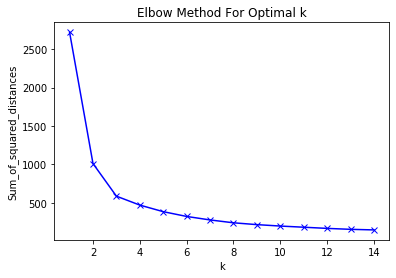

The optimized number of clusters is: 3


In [64]:
# INSERT your code (or comment) here

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Df_Q1)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("The optimized number of clusters is:",3)

3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [100]:
# INSERT your code (or comment) here

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics


kmns = KMeans(n_clusters=3, init='random',random_state=0)
print(kmns)
kmns.fit(Df_Q1)

centroids= kmns.cluster_centers_
labels= kmns.labels_

Prd_0 = list(labels).count(2)
Prd_1 = list(labels).count(0)
Prd_2 = list(labels).count(1)

print(Prd_0)
print(Prd_1)
print(Prd_2)

print(centroids)
print(labels)

class_table = pd.DataFrame(columns = ['Real', 'Predict'])
class_table['Real'] = Df['Class']
class_table['Predict'] = labels

print(class_table)

group_class = class_table.groupby(['Real','Predict']).size()
            
print(group_class)

#Real 0 match predict 2
#Real 1 match predict 0
#Real 2 match predict 1

Purity = (1/len(class_table))*(60+60+68)
percentage_Euclidean = "{:.0%}". format(Purity)
print("The purity score is:", percentage_Euclidean)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)
61
72
77
[[14.64847222 14.46041667  0.87916667  5.56377778  3.27790278  2.64893333
   5.19231944]
 [11.96441558 13.27480519  0.8522      5.22928571  2.87292208  4.75974026
   5.08851948]
 [18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
     Real  Predict
0       0        0
1       0        0
2       0        0
3       0        0
4       0     

In [152]:
# INSERT your code (or comment) here

from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.encoder import type_encoding, cluster_encoder
from pyclustering.utils.metric import type_metric, distance_metric

initial_centers = kmeans_plusplus_initializer(Df_Q1, 3).initialize()

#Euclidean
print("The purity score when implmenting Euclidean distance is:", percentage_Euclidean)

##########################################################################################################################################

#Squared euclidean

Squared_euclidean_metric = distance_metric(type_metric.EUCLIDEAN_SQUARE)

Squared_euclidean_kmeans_instance = kmeans(Df_Q1, initial_centers, metric = Squared_euclidean_metric)

Squared_euclidean_kmeans_instance.process()
Squared_euclidean_clusters = Squared_euclidean_kmeans_instance.get_clusters()
Squared_euclidean_final_centers = Squared_euclidean_kmeans_instance.get_centers()

Squared_euclidean_type_repr = Squared_euclidean_kmeans_instance.get_cluster_encoding()
Squared_euclidean_encoder = cluster_encoder(Squared_euclidean_type_repr, Squared_euclidean_clusters, Df_Q1)

Squared_euclidean_encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
#print("Squared euclidean Index Labeling:", Squared_euclidean_encoder.get_clusters())

#Squared euclidean Purity Score

Squared_euclidean_class_table = pd.DataFrame(columns = ['Real', 'Predict'])
Squared_euclidean_class_table['Real'] = Df['Class']
Squared_euclidean_class_table['Predict'] = Manhattan_encoder.get_clusters()
Squared_euclidean_group_class = Squared_euclidean_class_table.groupby(['Real','Predict']).size()            
print(Squared_euclidean_group_class)

Squared_euclidean_Purity = (1/len(Squared_euclidean_class_table))*(57+60+70)
Squared_euclidean_percentage = "{:.0%}". format(Squared_euclidean_Purity)
print("The purity score when implmenting Manhattan distance is:", Squared_euclidean_percentage)


#########################################################################################################################################

#Manhattan 

Manhattan_metric = distance_metric(type_metric.MANHATTAN)

Manhattan_kmeans_instance = kmeans(Df_Q1, initial_centers, metric = Manhattan_metric)

Manhattan_kmeans_instance.process()
Manhattan_clusters = Manhattan_kmeans_instance.get_clusters()
Manhattan_final_centers = Manhattan_kmeans_instance.get_centers()

Manhattan_type_repr = Manhattan_kmeans_instance.get_cluster_encoding()
Manhattan_encoder = cluster_encoder(Manhattan_type_repr, Manhattan_clusters, Df_Q1)

Manhattan_encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
#print("Manhattan Index Labeling:", Manhattan_encoder.get_clusters())

#Manhattan Purity Score

Manhattan_class_table = pd.DataFrame(columns = ['Real', 'Predict'])
Manhattan_class_table['Real'] = Df['Class']
Manhattan_class_table['Predict'] = Manhattan_encoder.get_clusters()
Manhattan_group_class =Manhattan_class_table.groupby(['Real','Predict']).size()            
print(Manhattan_group_class)

Manhattan_Purity = (1/len(Manhattan_class_table))*(57+60+70)
Manhattan_percentage = "{:.0%}". format(Manhattan_Purity)
print("The purity score when implmenting Manhattan distance is:", Manhattan_percentage)


##########################################################################################################################################

#Chebyshev 

Chebyshev_metric = distance_metric(type_metric.CHEBYSHEV)

Chebyshev_kmeans_instance = kmeans(Df_Q1, initial_centers, metric = Chebyshev_metric)

Chebyshev_kmeans_instance.process()
Chebyshev_clusters = Chebyshev_kmeans_instance.get_clusters()
Chebyshev_final_centers = Chebyshev_kmeans_instance.get_centers()

Chebyshev_type_repr = Chebyshev_kmeans_instance.get_cluster_encoding()
Chebyshev_encoder = cluster_encoder(Chebyshev_type_repr, Chebyshev_clusters, Df_Q1)

Chebyshev_encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
#print("Chebyshev Index Labeling:", Chebyshev_encoder.get_clusters())

#Chebyshev Purity Score

Chebyshev_class_table = pd.DataFrame(columns = ['Real', 'Predict'])
Chebyshev_class_table['Real'] = Df['Class']
Chebyshev_class_table['Predict'] = Chebyshev_encoder.get_clusters()
Chebyshev_group_class =Chebyshev_class_table.groupby(['Real','Predict']).size()            
print(Chebyshev_group_class)

Chebyshev_Purity = (1/len(Chebyshev_class_table))*(58+60+66)
Chebyshev_percentage = "{:.0%}". format(Chebyshev_Purity)
print("The purity score when implmenting Chebyshev distance is:", Chebyshev_percentage)


##########################################################################################################################################

#Minkowski

Minkowski_metric = distance_metric(type_metric.MINKOWSKI, degree=2)

Minkowski_kmeans_instance = kmeans(Df_Q1, initial_centers, metric = Minkowski_metric)

Minkowski_kmeans_instance.process()
Minkowski_clusters = Minkowski_kmeans_instance.get_clusters()
Minkowski_final_centers = Minkowski_kmeans_instance.get_centers()

Minkowski_type_repr = Minkowski_kmeans_instance.get_cluster_encoding()
Minkowski_encoder = cluster_encoder(Minkowski_type_repr, Minkowski_clusters, Df_Q1)

Minkowski_encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
#print("Minkowski Index Labeling:", Minkowski_encoder.get_clusters())

#Minkowski Purity Score

Minkowski_class_table = pd.DataFrame(columns = ['Real', 'Predict'])
Minkowski_class_table['Real'] = Df['Class']
Minkowski_class_table['Predict'] = Minkowski_encoder.get_clusters()
Minkowski_group_class =Minkowski_class_table.groupby(['Real','Predict']).size()            
print(Minkowski_group_class)

Minkowski_Purity = (1/len(Minkowski_class_table))*(60+60+68)
Minkowski_percentage = "{:.0%}". format(Minkowski_Purity)
print("The purity score when implmenting Minkowski distance is:", Minkowski_percentage)
print("The purity score when implmenting euclidean distance is higher than others")

The purity score when implmenting Euclidean distance is: 90%
Real  Predict
0     1          57
      2          13
1     0          60
      1          10
2     2          70
dtype: int64
The purity score when implmenting Manhattan distance is: 89%
Real  Predict
0     0          14
      1          56
1     1          12
      2          58
2     0          70
dtype: int64
The purity score when implmenting Manhattan distance is: 89%
Real  Predict
0     0           9
      1          58
      2           3
1     1          10
      2          60
2     0          66
      1           4
dtype: int64
The purity score when implmenting Chebyshev distance is: 88%
Real  Predict
0     0          12
      1          57
      2           1
1     1          10
      2          60
2     0          70
dtype: int64
The purity score when implmenting Minkowski distance is: 90%
The purity score when implmenting euclidean distance is higher than others


5. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why? __(3 marks)__

In [160]:
# INSERT your code (or comment) here

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics

X = Df_Q1
Y = Df['Class']

X_new = SelectKBest(chi2, k=3).fit_transform(X, Y)

New_kmns = KMeans(n_clusters=3, init='random',random_state=0)
print(New_kmns)
New_kmns.fit(X_new)

New_centroids= New_kmns.cluster_centers_
New_labels= New_kmns.labels_

print(New_centroids)
print(New_labels)

New_class_table = pd.DataFrame(columns = ['Real', 'Predict'])
New_class_table['Real'] = Df['Class']
New_class_table['Predict'] = New_labels

New_group_class = New_class_table.groupby(['Real','Predict']).size()            
print(New_group_class)

New_Purity = (1/len(New_class_table))*(60+60+68)
New_percentage = "{:.0%}". format(New_Purity)
print("The purity score when implmenting feature selection is:",New_percentage)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)
[[14.64847222 14.46041667  2.64893333]
 [11.96441558 13.27480519  4.75974026]
 [18.72180328 16.29737705  3.60359016]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
Real  Predict
0     0          60
      1           9
      2           1
1     0          10
      2          60
2     0           2
      1          68
dtype: int64
The purity score when implmenting feature selection is: 90%


# Part-2 (Dimensionality Reduction using PCA/SVD) *(15 marks)*

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality. __(2.5 marks)__
  
  What is the minimum dimension that captures:
    - at least 89% variance? __(1.5 marks)__
    - at least 99% variance? __(1 marks)__

[ 71.87  88.98  98.67  99.65  99.92 100.   100.01]
At least 89% variance needs: 1
At least 99% variance needs: 2


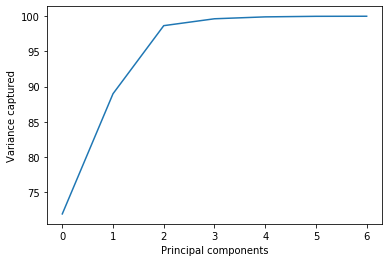

In [174]:
# INSERT your code (or comment) here

import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

Df = pd.read_csv('clustering.csv')

Df_Q2 = Df.iloc[:, [0,1,2,3,4,5,6]]

Xnorm = scale(Df_Q2)
pca = PCA(n_components=7)
pca.fit(Xnorm) 
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var)
plt.plot(var)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

print("At least 89% variance needs:", 1)
print("At least 99% variance needs:", 2)

2. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. __(7 marks)__

(210, 1)
(210, 2)
(210, 3)
(210, 4)
(210, 5)
(210, 6)
The purity score with 1 compounent is: 86%
The purity score with 2 compounents is: 91%
The purity score with 3 compounents is: 91%
The purity score with 4 compounents is: 92%
The purity score with 5 compounents is: 92%
The purity score with 5 compounents is: 92%


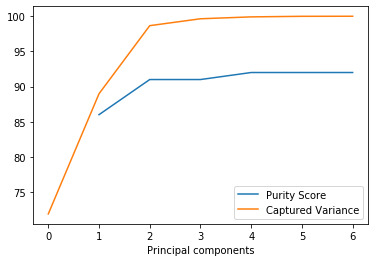

The purity score is increasing with the growing of the captured variance


In [192]:
# INSERT your code (or comment) here

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

pca_89 = PCA(n_components = 1)
pca_89 = pca_89.fit(Xnorm)
pca_1D = pca_89.transform(Xnorm)
print(pca_1D.shape)

pca_99 = PCA(n_components = 2)
pca_99 = pca_99.fit(Xnorm)
pca_2D = pca_99.transform(Xnorm)
print(pca_2D.shape)

pca_996 = PCA(n_components = 3)
pca_996 = pca_996.fit(Xnorm)
pca_3D = pca_996.transform(Xnorm)
print(pca_3D.shape)

pca_999 = PCA(n_components = 4)
pca_999 = pca_999.fit(Xnorm)
pca_4D = pca_999.transform(Xnorm)
print(pca_4D.shape)

pca_100 = PCA(n_components = 5)
pca_100 = pca_100.fit(Xnorm)
pca_5D = pca_100.transform(Xnorm)
print(pca_5D.shape)

pca_1001 = PCA(n_components = 6)
pca_1001 = pca_1001.fit(Xnorm)
pca_6D = pca_1001.transform(Xnorm)
print(pca_6D.shape)

#########################################################################################################################################
#Clustering for 1 components 89%

pca_1D_kmns = KMeans(n_clusters=3, init='random',random_state=0)
#print(pca_1D_kmns)
pca_1D_kmns.fit(pca_1D)

pca_1D_centroids= pca_1D_kmns.cluster_centers_
pca_1D_labels= pca_1D_kmns.labels_

#########################################################################################################################################
#Clustering for 2 components 99%

pca_2D_kmns = KMeans(n_clusters=3, init='random',random_state=0)
#print(pca_2D_kmns)
pca_2D_kmns.fit(pca_2D)

pca_2D_centroids= pca_2D_kmns.cluster_centers_
pca_2D_labels= pca_2D_kmns.labels_

#########################################################################################################################################
#Clustering for 3 components 

pca_3D_kmns = KMeans(n_clusters=3, init='random',random_state=0)
#print(pca_3D_kmns)
pca_3D_kmns.fit(pca_3D)

pca_3D_centroids= pca_3D_kmns.cluster_centers_
pca_3D_labels= pca_3D_kmns.labels_

#########################################################################################################################################
#Clustering for 4 components 

pca_4D_kmns = KMeans(n_clusters=3, init='random',random_state=0)
#print(pca_4D_kmns)
pca_4D_kmns.fit(pca_4D)

pca_4D_centroids= pca_4D_kmns.cluster_centers_
pca_4D_labels= pca_4D_kmns.labels_

#########################################################################################################################################
#Clustering for 5 components 

pca_5D_kmns = KMeans(n_clusters=3, init='random',random_state=0)
#print(pca_5D_kmns)
pca_5D_kmns.fit(pca_5D)

pca_5D_centroids= pca_5D_kmns.cluster_centers_
pca_5D_labels= pca_5D_kmns.labels_

#########################################################################################################################################
#Clustering for 6 components 

pca_6D_kmns = KMeans(n_clusters=3, init='random',random_state=0)
#print(pca_6D_kmns)
pca_6D_kmns.fit(pca_6D)

pca_6D_centroids= pca_6D_kmns.cluster_centers_
pca_6D_labels= pca_6D_kmns.labels_

##########################################################################################################################################
#Purity

#print(pca_1D_labels)
#print(pca_2D_labels)
#print(pca_3D_labels)
#print(pca_4D_labels)
#print(pca_5D_labels)
#print(pca_6D_labels)

pca_1D_class_table = pd.DataFrame(columns = ['Real', 'Predict'])
pca_2D_class_table = pd.DataFrame(columns = ['Real', 'Predict'])
pca_3D_class_table = pd.DataFrame(columns = ['Real', 'Predict'])
pca_4D_class_table = pd.DataFrame(columns = ['Real', 'Predict'])
pca_5D_class_table = pd.DataFrame(columns = ['Real', 'Predict'])
pca_6D_class_table = pd.DataFrame(columns = ['Real', 'Predict'])

pca_1D_class_table['Real'] = Df['Class']
pca_2D_class_table['Real'] = Df['Class']
pca_3D_class_table['Real'] = Df['Class']
pca_4D_class_table['Real'] = Df['Class']
pca_5D_class_table['Real'] = Df['Class']
pca_6D_class_table['Real'] = Df['Class']

pca_1D_class_table['Predict'] = pca_1D_labels
pca_2D_class_table['Predict'] = pca_2D_labels
pca_3D_class_table['Predict'] = pca_3D_labels
pca_4D_class_table['Predict'] = pca_4D_labels
pca_5D_class_table['Predict'] = pca_5D_labels
pca_6D_class_table['Predict'] = pca_6D_labels

pca_1D_group_class = pca_1D_class_table.groupby(['Real','Predict']).size()
pca_2D_group_class = pca_2D_class_table.groupby(['Real','Predict']).size()
pca_3D_group_class = pca_3D_class_table.groupby(['Real','Predict']).size()
pca_4D_group_class = pca_4D_class_table.groupby(['Real','Predict']).size()
pca_5D_group_class = pca_5D_class_table.groupby(['Real','Predict']).size()
pca_6D_group_class = pca_6D_class_table.groupby(['Real','Predict']).size()
           
#print(pca_1D_group_class)
#print(pca_2D_group_class)
#print(pca_3D_group_class)
#print(pca_4D_group_class)
#print(pca_5D_group_class)
#print(pca_6D_group_class)

pca_1D_Purity = (1/len(pca_1D_class_table))*(53+57+70)
pca_1D_percentage = "{:.0%}". format(pca_1D_Purity)
print("The purity score with 1 compounent is:",pca_1D_percentage)

pca_2D_Purity = (1/len(pca_2D_class_table))*(60+65+66)
pca_2D_percentage = "{:.0%}". format(pca_2D_Purity)
print("The purity score with 2 compounents is:",pca_2D_percentage)

pca_3D_Purity = (1/len(pca_3D_class_table))*(60+65+66)
pca_3D_percentage = "{:.0%}". format(pca_3D_Purity)
print("The purity score with 3 compounents is:",pca_3D_percentage)

pca_4D_Purity = (1/len(pca_4D_class_table))*(62+65+66)
pca_4D_percentage = "{:.0%}". format(pca_4D_Purity)
print("The purity score with 4 compounents is:",pca_4D_percentage)

pca_5D_Purity = (1/len(pca_5D_class_table))*(62+65+66)
pca_5D_percentage = "{:.0%}". format(pca_5D_Purity)
print("The purity score with 5 compounents is:",pca_5D_percentage)

pca_6D_Purity = (1/len(pca_6D_class_table))*(62+65+66)
pca_6D_percentage = "{:.0%}". format(pca_6D_Purity)
print("The purity score with 5 compounents is:",pca_6D_percentage)

##########################################################################################################################################
#Plot line chart

Purity_Score_Total = [86, 91, 91, 92, 92, 92]
Number_Components = [1, 2, 3, 4, 5, 6]
plt.plot(Number_Components, Purity_Score_Total, label = "Purity Score")
Df_Q2 = Df.iloc[:, [0,1,2,3,4,5,6]]
Xnorm = scale(Df_Q2)
pca = PCA(n_components=7)
pca.fit(Xnorm) 
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var, label = "Captured Variance")
plt.xlabel("Principal components")
plt.legend()
plt.show()

print("The purity score is increasing with the growing of the captured variance")

3. Let's assume you have two datasets one is linear and another is curved structural data.
    - Can we apply PCA on these datasets? Justify your answer. __(3 marks)__ 

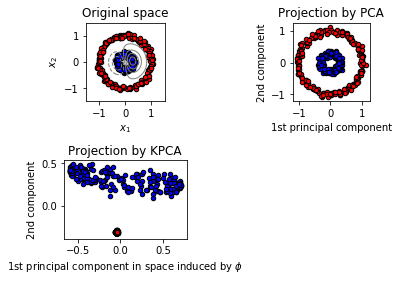

KPCA could used for linear and curved structural data. However if the coefficient of correlation between variables is too weak then applying PCA would be useless


In [17]:
# INSERT your code (or comment) here

#PCA for curved structural data. (KPCA)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.tight_layout()
plt.show()
print("KPCA could used for linear curved structural data. However if the coefficient of correlation between variables is too weak then applying PCA would be useless")